# Time Series Clustering

Here, we compute the silhouette widths for various cluster values, select the most appropriate cluster value per objective, and identify the scenarios with the worst clusters.



## Imports

In [1]:
import pandas as pd

from optimization.scenariodiscovery.clustering.silhouette_widths import *
from optimization.general.visualization import *
from ema_workbench.analysis import plotting, Density
import os

## Load Silhouette Widths

In [2]:
target_directory = os.getcwd() + '/data/'
n = 30000
file_name = f'silhouette_widths_{n}.csv'
widths = pd.read_csv(target_directory + file_name, index_col='Unnamed: 0')
widths

## Plotting silhouette widths

In [3]:
plot_silhouette_widths(widths, saving=False)

## Visual Inspection and Resulting cluster-number per objective

Given the figures above and some visual inspection of the pathways and their clusters, we get the following cluster number per objective:


- 'Utility': 2,
- 'Disutility': ,
- 'Intratemporal consumption GINI': ,
- 'Intratemporal damage GINI': ,
- 'Lowest income per capita': ,
- 'Highest damage per capita': ,
- 'Distance to consumption threshold': ,
- 'Population below consumption threshold': ,
- 'Distance to damage threshold': ,
- 'Population above damage threshold': ,
- 'Temperature overshoot': ,


---

## Looking at the clusters

## Outcome: Disutility

In [4]:
outcome_name = 'Disutility'
experiments = get_experiments_with_clusters(objective=outcome_name, cluster_number=3)
experiments

,emdd,fosslim,scenario_cback,scenario_elasticity_of_damages,scenario_limmiu,scenario_pop_gdp,scenario_sigma,t2xco2_dist,t2xco2_index,sr,miu,irstp_consumption,irstp_damage,scenario,policy,model,clusters
0,0.453473,6314.416252,1.0,2.0,0.0,2.0,1.0,1.0,575.0,0.248,2135.0,0.015,0.015,0,Nordhaus,RICE,2
1,0.100512,8582.074847,1.0,2.0,1.0,0.0,2.0,1.0,678.0,0.248,2135.0,0.015,0.015,1,Nordhaus,RICE,2
2,0.370575,8454.543455,1.0,1.0,1.0,5.0,2.0,0.0,982.0,0.248,2135.0,0.015,0.015,2,Nordhaus,RICE,2
3,0.381410,9791.267411,1.0,0.0,0.0,0.0,0.0,0.0,598.0,0.248,2135.0,0.015,0.015,3,Nordhaus,RICE,1
4,0.007688,9394.089046,0.0,2.0,0.0,5.0,0.0,0.0,567.0,0.248,2135.0,0.015,0.015,4,Nordhaus,RICE,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.136116,8389.246911,1.0,2.0,1.0,5.0,0.0,2.0,915.0,0.248,2135.0,0.015,0.015,29995,Nordhaus,RICE,2
29996,0.198183,13249.802156,1.0,0.0,1.0,3.0,0.0,1.0,385.0,0.248,2135.0,0.015,0.015,29996,Nordhaus,RICE,2
29997,0.460021,8236.417737,1.0,0.0,0.0,1.0,0.0,1.0,728.0,0.248,2135.0,0.015,0.015,29997,Nordhaus,RICE,2
29998,0.590543,10609.643604,0.0,2.0,0.0,2.0,1.0,1.0,659.0,0.248,2135.0,0.015,0.015,29998,Nordhaus,RICE,2


## Loading outcomes from 30k run

In [6]:
target_directory = os.path.dirname(os.path.dirname(os.getcwd())) + '/exploration/data/'
_, outcomes = load_results(file_name=target_directory + 'results_open_exploration_30000')

outcomes = pd.DataFrame(outcomes)

In [7]:
plot_one_pathway(outcomes, outcome_name=outcome_name)

,Disutility 2005,Disutility 2015,Disutility 2025,Disutility 2035,Disutility 2045,Disutility 2055,Disutility 2065,Disutility 2075,Disutility 2085,Disutility 2095,...,Disutility 2215,Disutility 2225,Disutility 2235,Disutility 2245,Disutility 2255,Disutility 2265,Disutility 2275,Disutility 2285,Disutility 2295,Disutility 2305
0,1.414376e-04,0.000256,4.091958,6.183791,8.877734,11.987645,15.435710,19.274769,23.460791,28.000911,...,74.802474,78.679099,82.586480,86.512151,90.450962,94.441629,98.487619,102.558071,106.643787,110.530524
1,5.721766e-08,0.000048,0.970939,1.798878,3.080842,4.864490,7.188401,10.107764,13.630014,17.742953,...,58.634240,60.371249,61.937943,63.326199,64.554398,65.710828,67.161195,70.652895,74.151107,77.506608
2,2.203681e-05,0.000168,2.797787,4.388644,6.508774,9.042451,11.929133,15.191198,18.778831,22.665890,...,50.983223,51.930008,52.698331,53.266740,53.622808,53.783156,55.799287,57.971276,60.123223,62.121618
3,2.806776e-05,0.000178,3.111964,5.059356,7.716933,10.980695,14.800982,19.236352,24.253249,29.861491,...,104.499962,111.291621,118.199615,125.203450,132.293263,139.525721,146.906186,154.382321,161.938442,169.240616
4,7.576418e-09,0.000032,0.706485,1.406335,2.567382,4.299489,6.709759,9.925086,14.037743,19.124320,...,135.312052,149.111979,163.677546,178.962050,193.125836,207.885091,223.233387,239.094933,255.447264,271.873558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,1.245977e-07,0.000057,0.878822,1.426402,2.237220,3.298986,4.609398,6.181129,8.007887,10.070892,...,33.403067,35.019583,36.553977,37.973450,39.750770,42.164214,44.616226,47.098147,49.611021,52.052626
29996,4.858373e-07,0.000075,1.277182,2.110793,3.306635,4.846002,6.719930,8.945834,11.505287,14.373153,...,41.415833,42.875204,44.220050,45.422480,46.467090,48.411073,50.936909,53.472905,56.019834,58.459957
29997,1.639589e-04,0.000265,4.365337,6.726242,9.791730,13.363940,17.356201,21.831200,26.738496,32.089598,...,92.260649,96.961915,101.680123,106.403616,111.128633,115.903542,120.736480,125.588090,130.447481,135.043918
29998,3.232914e-03,0.000544,7.477873,10.151674,13.381605,16.786244,20.261732,23.912409,27.697777,31.653655,...,66.365232,69.161056,71.938247,74.689602,77.413704,80.138454,82.876059,85.605643,88.321274,90.837456


In [12]:
reshaphed_outcomes = get_outcomes_reshaped(outcomes, objective_names=[outcome_name])

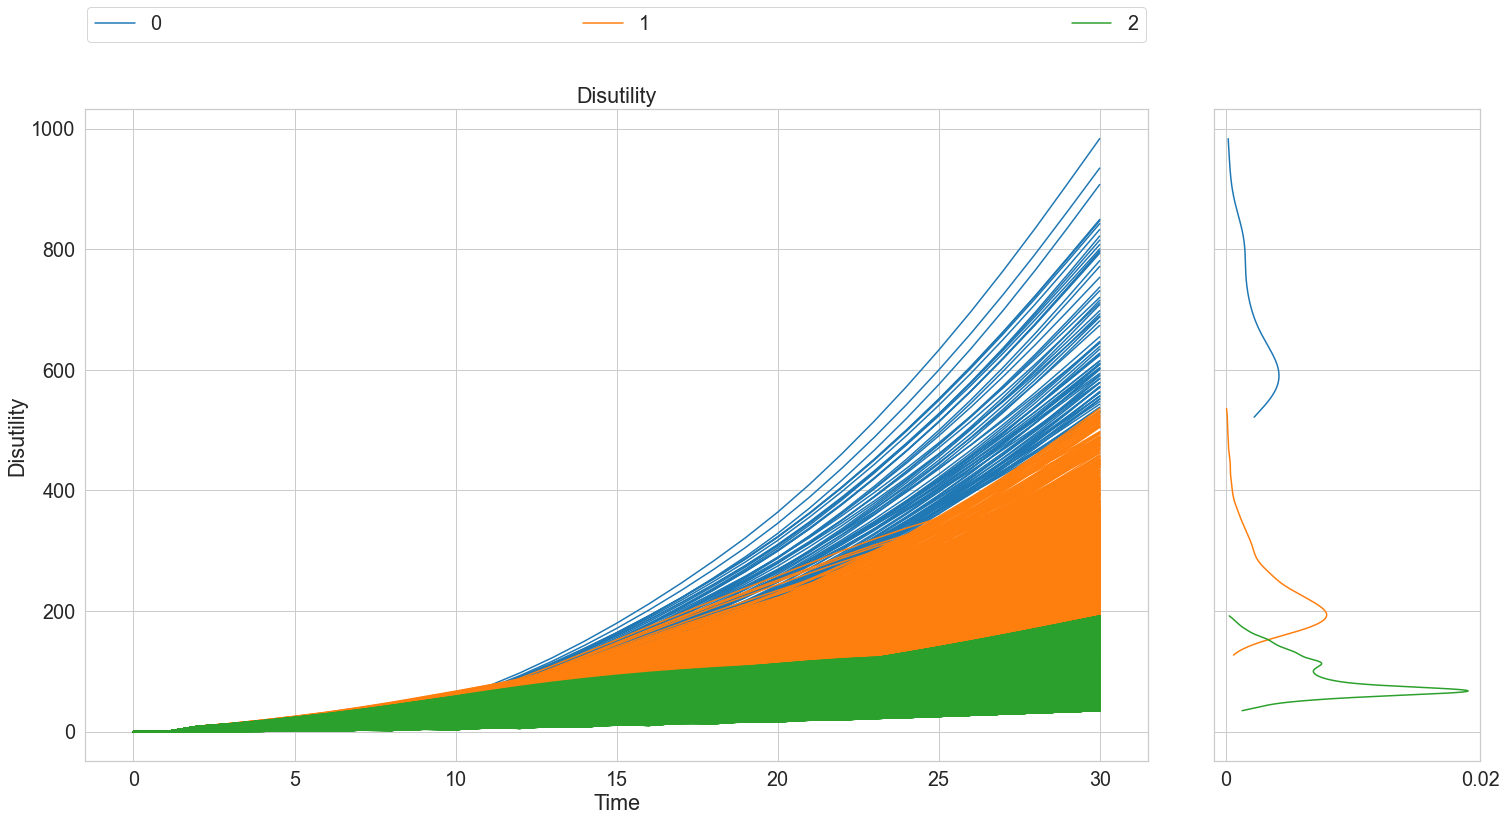

In [10]:
fig,axes = plotting.lines(experiments, reshaphed_outcomes, outcomes_to_show=outcome_name, group_by='clusters', density=Density.KDE)
fig.set_size_inches(25, 12)
plt.show()

ValueError: arrays must all be same length

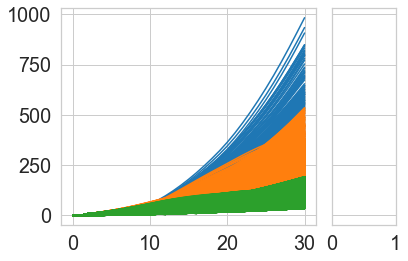

In [13]:
fig,axes = plotting.lines(experiments, reshaphed_outcomes, outcomes_to_show=outcome_name, group_by='clusters', density=Density.BOXPLOT)
fig.set_size_inches(25, 12)
plt.show()